In [96]:
import numpy as np
import pandas as pd

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pyspark

In [3]:
from pyspark.sql import SparkSession

In [4]:
spark = SparkSession.builder.appName("Final_Project").getOrCreate()

spark.sparkContext.setLogLevel("ERROR")

23/02/27 15:24:31 WARN Utils: Your hostname, madhur-pc resolves to a loopback address: 127.0.1.1; using 192.168.0.105 instead (on interface wlo1)
23/02/27 15:24:31 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


23/02/27 15:24:32 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [5]:
spark

In [6]:
# loading the datasets

match = spark.read.option("header","true").csv("match.csv", inferSchema = True)

delivery = spark.read.option("header","true").csv("deliveries.csv", inferSchema = True)

 Infer schema will automatically guess the data types for each field.

In [7]:
match.printSchema(),delivery.printSchema()

root
 |-- ID: integer (nullable = true)
 |-- City: string (nullable = true)
 |-- Date: timestamp (nullable = true)
 |-- Season: string (nullable = true)
 |-- MatchNumber: string (nullable = true)
 |-- Team1: string (nullable = true)
 |-- Team2: string (nullable = true)
 |-- Venue: string (nullable = true)
 |-- TossWinner: string (nullable = true)
 |-- TossDecision: string (nullable = true)
 |-- SuperOver: string (nullable = true)
 |-- WinningTeam: string (nullable = true)
 |-- WonBy: string (nullable = true)
 |-- Margin: string (nullable = true)
 |-- method: string (nullable = true)
 |-- Player_of_Match: string (nullable = true)
 |-- Team1Players: string (nullable = true)
 |-- Team2Players: string (nullable = true)
 |-- Umpire1: string (nullable = true)
 |-- Umpire2: string (nullable = true)

root
 |-- ID: integer (nullable = true)
 |-- innings: integer (nullable = true)
 |-- overs: integer (nullable = true)
 |-- ballnumber: integer (nullable = true)
 |-- batter: string (nullable = tru

(None, None)

In [8]:
print(match.count(), len(match.columns))

950 20


In [9]:
print(delivery.count(), len(delivery.columns))

225954 17


In [10]:
match.cache(),delivery.cache()

(DataFrame[ID: int, City: string, Date: timestamp, Season: string, MatchNumber: string, Team1: string, Team2: string, Venue: string, TossWinner: string, TossDecision: string, SuperOver: string, WinningTeam: string, WonBy: string, Margin: string, method: string, Player_of_Match: string, Team1Players: string, Team2Players: string, Umpire1: string, Umpire2: string],
 DataFrame[ID: int, innings: int, overs: int, ballnumber: int, batter: string, bowler: string, non-striker: string, extra_type: string, batsman_run: int, extras_run: int, total_run: int, non_boundary: int, isWicketDelivery: int, player_out: string, kind: string, fielders_involved: string, BattingTeam: string])

In [11]:
match.toPandas()

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7,NA,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7,NA,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14,NA,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7,NA,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5,NA,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,335986,Kolkata,2008-04-20,2007/08,4,Kolkata Knight Riders,Deccan Chargers,Eden Gardens,Deccan Chargers,bat,N,Kolkata Knight Riders,Wickets,5,NA,DJ Hussey,"['WP Saha', 'BB McCullum', 'RT Ponting', 'SC G...","['AC Gilchrist', 'Y Venugopal Rao', 'VVS Laxma...",BF Bowden,K Hariharan
946,335985,Mumbai,2008-04-20,2007/08,5,Mumbai Indians,Royal Challengers Bangalore,Wankhede Stadium,Mumbai Indians,bat,N,Royal Challengers Bangalore,Wickets,5,NA,MV Boucher,"['L Ronchi', 'ST Jayasuriya', 'DJ Thornely', '...","['S Chanderpaul', 'R Dravid', 'LRPL Taylor', '...",SJ Davis,DJ Harper
947,335984,Delhi,2008-04-19,2007/08,3,Delhi Daredevils,Rajasthan Royals,Feroz Shah Kotla,Rajasthan Royals,bat,N,Delhi Daredevils,Wickets,9,NA,MF Maharoof,"['G Gambhir', 'V Sehwag', 'S Dhawan', 'MK Tiwa...","['T Kohli', 'YK Pathan', 'SR Watson', 'M Kaif'...",Aleem Dar,GA Pratapkumar
948,335983,Chandigarh,2008-04-19,2007/08,2,Kings XI Punjab,Chennai Super Kings,"Punjab Cricket Association Stadium, Mohali",Chennai Super Kings,bat,N,Chennai Super Kings,Runs,33,NA,MEK Hussey,"['K Goel', 'JR Hopes', 'KC Sangakkara', 'Yuvra...","['PA Patel', 'ML Hayden', 'MEK Hussey', 'MS Dh...",MR Benson,SL Shastri


In [12]:
delivery.toPandas()

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NA,0,0,0,0,0,NA,NA,NA,Rajasthan Royals
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NA,NA,NA,Rajasthan Royals
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NA,1,0,1,0,0,NA,NA,NA,Rajasthan Royals
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NA,0,0,0,0,0,NA,NA,NA,Rajasthan Royals
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NA,0,0,0,0,0,NA,NA,NA,Rajasthan Royals
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225949,335982,2,14,5,P Kumar,I Sharma,SB Joshi,legbyes,0,1,1,0,0,NA,NA,NA,Royal Challengers Bangalore
225950,335982,2,14,6,SB Joshi,I Sharma,P Kumar,NA,1,0,1,0,0,NA,NA,NA,Royal Challengers Bangalore
225951,335982,2,14,7,P Kumar,I Sharma,SB Joshi,NA,0,0,0,0,0,NA,NA,NA,Royal Challengers Bangalore
225952,335982,2,15,1,SB Joshi,LR Shukla,P Kumar,wides,0,1,1,0,0,NA,NA,NA,Royal Challengers Bangalore


## Exploratory Data Analysis

In [13]:
# creating copies of original datarames


match1 = match.select("*")

#delivery1 = delivery.select("*")

In [14]:
delivery1 = delivery.select("*")

In [15]:
match1.toPandas()

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7,NA,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7,NA,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14,NA,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7,NA,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5,NA,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,335986,Kolkata,2008-04-20,2007/08,4,Kolkata Knight Riders,Deccan Chargers,Eden Gardens,Deccan Chargers,bat,N,Kolkata Knight Riders,Wickets,5,NA,DJ Hussey,"['WP Saha', 'BB McCullum', 'RT Ponting', 'SC G...","['AC Gilchrist', 'Y Venugopal Rao', 'VVS Laxma...",BF Bowden,K Hariharan
946,335985,Mumbai,2008-04-20,2007/08,5,Mumbai Indians,Royal Challengers Bangalore,Wankhede Stadium,Mumbai Indians,bat,N,Royal Challengers Bangalore,Wickets,5,NA,MV Boucher,"['L Ronchi', 'ST Jayasuriya', 'DJ Thornely', '...","['S Chanderpaul', 'R Dravid', 'LRPL Taylor', '...",SJ Davis,DJ Harper
947,335984,Delhi,2008-04-19,2007/08,3,Delhi Daredevils,Rajasthan Royals,Feroz Shah Kotla,Rajasthan Royals,bat,N,Delhi Daredevils,Wickets,9,NA,MF Maharoof,"['G Gambhir', 'V Sehwag', 'S Dhawan', 'MK Tiwa...","['T Kohli', 'YK Pathan', 'SR Watson', 'M Kaif'...",Aleem Dar,GA Pratapkumar
948,335983,Chandigarh,2008-04-19,2007/08,2,Kings XI Punjab,Chennai Super Kings,"Punjab Cricket Association Stadium, Mohali",Chennai Super Kings,bat,N,Chennai Super Kings,Runs,33,NA,MEK Hussey,"['K Goel', 'JR Hopes', 'KC Sangakkara', 'Yuvra...","['PA Patel', 'ML Hayden', 'MEK Hussey', 'MS Dh...",MR Benson,SL Shastri


In [16]:
delivery.toPandas()

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NA,0,0,0,0,0,NA,NA,NA,Rajasthan Royals
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NA,NA,NA,Rajasthan Royals
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NA,1,0,1,0,0,NA,NA,NA,Rajasthan Royals
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NA,0,0,0,0,0,NA,NA,NA,Rajasthan Royals
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NA,0,0,0,0,0,NA,NA,NA,Rajasthan Royals
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225949,335982,2,14,5,P Kumar,I Sharma,SB Joshi,legbyes,0,1,1,0,0,NA,NA,NA,Royal Challengers Bangalore
225950,335982,2,14,6,SB Joshi,I Sharma,P Kumar,NA,1,0,1,0,0,NA,NA,NA,Royal Challengers Bangalore
225951,335982,2,14,7,P Kumar,I Sharma,SB Joshi,NA,0,0,0,0,0,NA,NA,NA,Royal Challengers Bangalore
225952,335982,2,15,1,SB Joshi,LR Shukla,P Kumar,wides,0,1,1,0,0,NA,NA,NA,Royal Challengers Bangalore


In [17]:
match1.columns

['ID',
 'City',
 'Date',
 'Season',
 'MatchNumber',
 'Team1',
 'Team2',
 'Venue',
 'TossWinner',
 'TossDecision',
 'SuperOver',
 'WinningTeam',
 'WonBy',
 'Margin',
 'method',
 'Player_of_Match',
 'Team1Players',
 'Team2Players',
 'Umpire1',
 'Umpire2']

In [18]:
delivery1.columns

['ID',
 'innings',
 'overs',
 'ballnumber',
 'batter',
 'bowler',
 'non-striker',
 'extra_type',
 'batsman_run',
 'extras_run',
 'total_run',
 'non_boundary',
 'isWicketDelivery',
 'player_out',
 'kind',
 'fielders_involved',
 'BattingTeam']

In [19]:
total_score_df = delivery.groupby('ID','innings').sum('total_run')

In [20]:
total_score_df.columns

['ID', 'innings', 'sum(total_run)']

In [21]:
total_score_df = total_score_df.withColumnRenamed('sum(total_run)','total_run')

In [22]:
total_score_df.columns

['ID', 'innings', 'total_run']

In [23]:
import pyspark.sql.functions as f
import pyspark.sql.types as T

In [24]:
total_score_df.show()

+-------+-------+---------+
|     ID|innings|total_run|
+-------+-------+---------+
|1304115|      1|      159|
|1304102|      1|      165|
|1304097|      2|      172|
|1254077|      3|        7|
|1254065|      2|      107|
|1216512|      4|        3|
|1304065|      2|      171|
|1304072|      1|      199|
|1216530|      2|      131|
|1304069|      1|      198|
|1254097|      1|      154|
|1216528|      1|      167|
|1216511|      1|      193|
|1216544|      1|      145|
|1254077|      4|        8|
|1216525|      2|      132|
|1304101|      1|      208|
|1254094|      2|      139|
|1216536|      2|      178|
|1304087|      2|      150|
+-------+-------+---------+
only showing top 20 rows



In [25]:
total_score_df = total_score_df[total_score_df.innings==1]

In [26]:
total_score_df.show()

+-------+-------+---------+
|     ID|innings|total_run|
+-------+-------+---------+
|1304115|      1|      159|
|1304102|      1|      165|
|1304072|      1|      199|
|1304069|      1|      198|
|1254097|      1|      154|
|1216528|      1|      167|
|1216511|      1|      193|
|1216544|      1|      145|
|1304101|      1|      208|
|1216492|      1|      162|
|1304089|      1|      170|
|1237180|      1|      189|
|1216513|      1|      178|
|1216501|      1|      167|
|1304047|      1|      131|
|1216516|      1|      164|
|1304082|      1|       68|
|1216534|      1|      163|
|1216498|      1|      126|
|1254080|      1|      171|
+-------+-------+---------+
only showing top 20 rows



In [27]:
total_score_df = total_score_df.withColumnRenamed('ID','ID_D')

In [28]:
match2 = match1.join(total_score_df.select('ID_D','total_run'),match1.ID == total_score_df.ID_D,"inner")

In [29]:
match2.cache()

DataFrame[ID: int, City: string, Date: timestamp, Season: string, MatchNumber: string, Team1: string, Team2: string, Venue: string, TossWinner: string, TossDecision: string, SuperOver: string, WinningTeam: string, WonBy: string, Margin: string, method: string, Player_of_Match: string, Team1Players: string, Team2Players: string, Umpire1: string, Umpire2: string, ID_D: int, total_run: bigint]

In [30]:
print(match2.count(),len(match2.columns))

950 22


In [31]:
match2.toPandas().head(10)

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,...,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2,ID_D,total_run
0,1082626,Chandigarh,2017-04-30,2017,36,Kings XI Punjab,Delhi Daredevils,"Punjab Cricket Association IS Bindra Stadium, ...",Kings XI Punjab,field,...,Wickets,10,NA,Sandeep Sharma,"['MJ Guptill', 'HM Amla', 'M Vohra', 'SE Marsh...","['SV Samson', 'SW Billings', 'KK Nair', 'SS Iy...",YC Barde,CK Nandan,1082626,67
1,829711,Chennai,2015-04-11,2015,4,Chennai Super Kings,Sunrisers Hyderabad,"MA Chidambaram Stadium, Chepauk",Chennai Super Kings,bat,...,Runs,45,NA,BB McCullum,"['DR Smith', 'BB McCullum', 'SK Raina', 'MS Dh...","['DA Warner', 'S Dhawan', 'KL Rahul', 'NV Ojha...",RK Illingworth,VA Kulkarni,829711,209
2,734021,Hyderabad,2014-05-20,2014,46,Sunrisers Hyderabad,Royal Challengers Bangalore,"Rajiv Gandhi International Stadium, Uppal",Royal Challengers Bangalore,bat,...,Wickets,7,NA,DA Warner,"['S Dhawan', 'DA Warner', 'NV Ojha', 'AJ Finch...","['CH Gayle', 'PA Patel', 'V Kohli', 'Yuvraj Si...",AK Chaudhary,NJ Llong,734021,160
3,733997,Cuttack,2014-05-11,2014,34,Kings XI Punjab,Kolkata Knight Riders,Barabati Stadium,Kolkata Knight Riders,field,...,Wickets,9,NA,G Gambhir,"['V Sehwag', 'Mandeep Singh', 'WP Saha', 'GJ M...","['RV Uthappa', 'G Gambhir', 'MK Pandey', 'JH K...",NJ Llong,CK Nandan,733997,149
4,501203,Kolkata,2011-04-11,2011,6,Kolkata Knight Riders,Deccan Chargers,Eden Gardens,Kolkata Knight Riders,bat,...,Runs,9,NA,JH Kallis,"['JH Kallis', 'MS Bisla', 'G Gambhir', 'MK Tiw...","['S Dhawan', 'IR Jaggi', 'B Chipli', 'KC Sanga...",RE Koertzen,SK Tarapore,501203,163
5,419132,Mumbai,2010-03-30,2009/10,27,Mumbai Indians,Kings XI Punjab,Brabourne Stadium,Mumbai Indians,field,...,Wickets,4,NA,SL Malinga,"['S Dhawan', 'SR Tendulkar', 'KA Pollard', 'SS...","['RS Bopara', 'SE Marsh', 'MS Bisla', 'DPMD Ja...",BR Doctrove,SK Tarapore,419132,163
6,392196,Durban,2009-04-27,2009,16,Chennai Super Kings,Deccan Chargers,Kingsmead,Deccan Chargers,field,...,Wickets,6,NA,HH Gibbs,"['PA Patel', 'ML Hayden', 'SK Raina', 'MS Dhon...","['AC Gilchrist', 'HH Gibbs', 'VVS Laxman', 'RG...",IL Howell,TH Wijewardene,392196,165
7,336009,Delhi,2008-05-08,2007/08,28,Delhi Daredevils,Chennai Super Kings,Feroz Shah Kotla,Chennai Super Kings,field,...,Wickets,4,NA,MS Dhoni,"['G Gambhir', 'V Sehwag', 'AB de Villiers', 'S...","['S Vidyut', 'SP Fleming', 'MS Dhoni', 'SK Rai...",Aleem Dar,RB Tiffin,336009,187
8,1304115,Mumbai,2022-05-21,2022,69,Delhi Capitals,Mumbai Indians,"Wankhede Stadium, Mumbai",Mumbai Indians,field,...,Wickets,5,NA,JJ Bumrah,"['PP Shaw', 'DA Warner', 'MR Marsh', 'RR Pant'...","['Ishan Kishan', 'RG Sharma', 'D Brevis', 'Til...",Nitin Menon,Tapan Sharma,1304115,159
9,1304102,Navi Mumbai,2022-05-09,2022,56,Kolkata Knight Riders,Mumbai Indians,"Dr DY Patil Sports Academy, Mumbai",Mumbai Indians,field,...,Runs,52,NA,JJ Bumrah,"['VR Iyer', 'AM Rahane', 'N Rana', 'SS Iyer', ...","['RG Sharma', 'Ishan Kishan', 'Tilak Varma', '...",CB Gaffaney,GR Sadashiv Iyer,1304102,165


In [32]:
match2.select('Team1').distinct().show(truncate=False)

+---------------------------+
|Team1                      |
+---------------------------+
|Sunrisers Hyderabad        |
|Chennai Super Kings        |
|Kolkata Knight Riders      |
|Kings XI Punjab            |
|Delhi Daredevils           |
|Mumbai Indians             |
|Delhi Capitals             |
|Lucknow Super Giants       |
|Rajasthan Royals           |
|Punjab Kings               |
|Royal Challengers Bangalore|
|Deccan Chargers            |
|Gujarat Lions              |
|Rising Pune Supergiant     |
|Pune Warriors              |
|Kochi Tuskers Kerala       |
|Gujarat Titans             |
|Rising Pune Supergiants    |
+---------------------------+



In [33]:
teams = ['Rajasthan Royals', 'Royal Challengers Bangalore',
       'Sunrisers Hyderabad', 'Delhi Capitals', 'Chennai Super Kings',
       'Gujarat Titans', 'Lucknow Super Giants', 'Kolkata Knight Riders',
       'Punjab Kings', 'Mumbai Indians']

In [34]:
from pyspark.sql.functions import regexp_replace

In [35]:
match2=match2.withColumn('Team1',regexp_replace('Team1','Delhi Daredevils','Delhi Capitals'))
match2=match2.withColumn('Team2',regexp_replace('Team2','Delhi Daredevils','Delhi Capitals'))

match2=match2.withColumn('Team1',regexp_replace('Team1','Deccan Chargers','Sunrisers Hyderabad'))
match2=match2.withColumn('Team2',regexp_replace('Team2','Deccan Chargers','Sunrisers Hyderabad'))

match2=match2.withColumn('Team1',regexp_replace('Team1','Kings XI Punjab','Punjab Kings'))
match2=match2.withColumn('Team2',regexp_replace('Team2','Kings XI Punjab','Punjab Kings'))

In [36]:
match2.select('Team1').distinct().show(truncate=False)

+---------------------------+
|Team1                      |
+---------------------------+
|Sunrisers Hyderabad        |
|Chennai Super Kings        |
|Kolkata Knight Riders      |
|Punjab Kings               |
|Delhi Capitals             |
|Mumbai Indians             |
|Lucknow Super Giants       |
|Rajasthan Royals           |
|Royal Challengers Bangalore|
|Gujarat Lions              |
|Rising Pune Supergiant     |
|Pune Warriors              |
|Kochi Tuskers Kerala       |
|Gujarat Titans             |
|Rising Pune Supergiants    |
+---------------------------+



In [37]:
match2=match2[match2.Team1.isin(teams)]
match2=match2[match2.Team2.isin(teams)]

delivery2 = delivery1[delivery1.BattingTeam.isin(teams)]

In [38]:
print(match2.count(),len(match2.columns))

835 22


In [39]:
match2 = match2.withColumnRenamed('ID','ID_M')

In [40]:
match2 = match2.withColumnRenamed('total_run','target_score')

In [41]:
match2 = match2.withColumn("target_score", match2.target_score + 1)

In [42]:
match2.toPandas().head()

,ID_M,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,...,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2,ID_D,target_score
0,1082626,Chandigarh,2017-04-30,2017,36,Punjab Kings,Delhi Capitals,"Punjab Cricket Association IS Bindra Stadium, ...",Kings XI Punjab,field,...,Wickets,10,NA,Sandeep Sharma,"['MJ Guptill', 'HM Amla', 'M Vohra', 'SE Marsh...","['SV Samson', 'SW Billings', 'KK Nair', 'SS Iy...",YC Barde,CK Nandan,1082626,68
1,829711,Chennai,2015-04-11,2015,4,Chennai Super Kings,Sunrisers Hyderabad,"MA Chidambaram Stadium, Chepauk",Chennai Super Kings,bat,...,Runs,45,NA,BB McCullum,"['DR Smith', 'BB McCullum', 'SK Raina', 'MS Dh...","['DA Warner', 'S Dhawan', 'KL Rahul', 'NV Ojha...",RK Illingworth,VA Kulkarni,829711,210
2,734021,Hyderabad,2014-05-20,2014,46,Sunrisers Hyderabad,Royal Challengers Bangalore,"Rajiv Gandhi International Stadium, Uppal",Royal Challengers Bangalore,bat,...,Wickets,7,NA,DA Warner,"['S Dhawan', 'DA Warner', 'NV Ojha', 'AJ Finch...","['CH Gayle', 'PA Patel', 'V Kohli', 'Yuvraj Si...",AK Chaudhary,NJ Llong,734021,161
3,733997,Cuttack,2014-05-11,2014,34,Punjab Kings,Kolkata Knight Riders,Barabati Stadium,Kolkata Knight Riders,field,...,Wickets,9,NA,G Gambhir,"['V Sehwag', 'Mandeep Singh', 'WP Saha', 'GJ M...","['RV Uthappa', 'G Gambhir', 'MK Pandey', 'JH K...",NJ Llong,CK Nandan,733997,150
4,501203,Kolkata,2011-04-11,2011,6,Kolkata Knight Riders,Sunrisers Hyderabad,Eden Gardens,Kolkata Knight Riders,bat,...,Runs,9,NA,JH Kallis,"['JH Kallis', 'MS Bisla', 'G Gambhir', 'MK Tiw...","['S Dhawan', 'IR Jaggi', 'B Chipli', 'KC Sanga...",RE Koertzen,SK Tarapore,501203,164


In [43]:
match2 = match2[match2.method!='D/L']

In [44]:
print(match2.count(),len(match2.columns))

820 22


In [45]:
match2 = match2['ID_M','City','WinningTeam','target_score','Team1', 'Team2']

In [46]:
match2.toPandas()

,ID_M,City,WinningTeam,target_score,Team1,Team2
0,1082626,Chandigarh,Kings XI Punjab,68,Punjab Kings,Delhi Capitals
1,829711,Chennai,Chennai Super Kings,210,Chennai Super Kings,Sunrisers Hyderabad
2,734021,Hyderabad,Sunrisers Hyderabad,161,Sunrisers Hyderabad,Royal Challengers Bangalore
3,733997,Cuttack,Kolkata Knight Riders,150,Punjab Kings,Kolkata Knight Riders
4,501203,Kolkata,Kolkata Knight Riders,164,Kolkata Knight Riders,Sunrisers Hyderabad
...,...,...,...,...,...,...
815,392225,Durban,Rajasthan Royals,146,Mumbai Indians,Rajasthan Royals
816,1216496,NA,Rajasthan Royals,217,Rajasthan Royals,Chennai Super Kings
817,1136577,Pune,Chennai Super Kings,205,Chennai Super Kings,Rajasthan Royals
818,734027,Kolkata,Kolkata Knight Riders,196,Kolkata Knight Riders,Royal Challengers Bangalore


In [47]:
delivery2.toPandas()

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NA,0,0,0,0,0,NA,NA,NA,Rajasthan Royals
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NA,NA,NA,Rajasthan Royals
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NA,1,0,1,0,0,NA,NA,NA,Rajasthan Royals
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NA,0,0,0,0,0,NA,NA,NA,Rajasthan Royals
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NA,0,0,0,0,0,NA,NA,NA,Rajasthan Royals
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161412,335982,2,14,5,P Kumar,I Sharma,SB Joshi,legbyes,0,1,1,0,0,NA,NA,NA,Royal Challengers Bangalore
161413,335982,2,14,6,SB Joshi,I Sharma,P Kumar,NA,1,0,1,0,0,NA,NA,NA,Royal Challengers Bangalore
161414,335982,2,14,7,P Kumar,I Sharma,SB Joshi,NA,0,0,0,0,0,NA,NA,NA,Royal Challengers Bangalore
161415,335982,2,15,1,SB Joshi,LR Shukla,P Kumar,wides,0,1,1,0,0,NA,NA,NA,Royal Challengers Bangalore


In [48]:
delivery2 = match2.join(delivery2,match2.ID_M==delivery2.ID,"inner")

In [49]:
delivery2.cache()

DataFrame[ID_M: int, City: string, WinningTeam: string, target_score: bigint, Team1: string, Team2: string, ID: int, innings: int, overs: int, ballnumber: int, batter: string, bowler: string, non-striker: string, extra_type: string, batsman_run: int, extras_run: int, total_run: int, non_boundary: int, isWicketDelivery: int, player_out: string, kind: string, fielders_involved: string, BattingTeam: string]

In [50]:
print(delivery2.count(),len(delivery2.columns))

151092 23


In [51]:
delivery2.toPandas()

,ID_M,City,WinningTeam,target_score,Team1,Team2,ID,innings,overs,ballnumber,...,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1312200,Ahmedabad,Gujarat Titans,131,Rajasthan Royals,Gujarat Titans,1312200,1,0,1,...,NA,0,0,0,0,0,NA,NA,NA,Rajasthan Royals
1,1312200,Ahmedabad,Gujarat Titans,131,Rajasthan Royals,Gujarat Titans,1312200,1,0,2,...,legbyes,0,1,1,0,0,NA,NA,NA,Rajasthan Royals
2,1312200,Ahmedabad,Gujarat Titans,131,Rajasthan Royals,Gujarat Titans,1312200,1,0,3,...,NA,1,0,1,0,0,NA,NA,NA,Rajasthan Royals
3,1312200,Ahmedabad,Gujarat Titans,131,Rajasthan Royals,Gujarat Titans,1312200,1,0,4,...,NA,0,0,0,0,0,NA,NA,NA,Rajasthan Royals
4,1312200,Ahmedabad,Gujarat Titans,131,Rajasthan Royals,Gujarat Titans,1312200,1,0,5,...,NA,0,0,0,0,0,NA,NA,NA,Rajasthan Royals
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151087,335982,Bangalore,Kolkata Knight Riders,223,Royal Challengers Bangalore,Kolkata Knight Riders,335982,2,14,5,...,legbyes,0,1,1,0,0,NA,NA,NA,Royal Challengers Bangalore
151088,335982,Bangalore,Kolkata Knight Riders,223,Royal Challengers Bangalore,Kolkata Knight Riders,335982,2,14,6,...,NA,1,0,1,0,0,NA,NA,NA,Royal Challengers Bangalore
151089,335982,Bangalore,Kolkata Knight Riders,223,Royal Challengers Bangalore,Kolkata Knight Riders,335982,2,14,7,...,NA,0,0,0,0,0,NA,NA,NA,Royal Challengers Bangalore
151090,335982,Bangalore,Kolkata Knight Riders,223,Royal Challengers Bangalore,Kolkata Knight Riders,335982,2,15,1,...,wides,0,1,1,0,0,NA,NA,NA,Royal Challengers Bangalore


In [52]:
delivery2 = delivery2[delivery2.innings==2]

In [53]:
from pyspark.sql.window import Window
import sys

windowval=Window.partitionBy('ID_M').rowsBetween(-sys.maxsize, 0)

In [54]:
delivery2 = delivery2.withColumn('current_score',f.sum('total_run').over(windowval))

In [55]:
delivery2 = delivery2.withColumn('runs_left',((delivery2['target_score'])-delivery2['current_score']))

In [56]:
delivery2.toPandas()

,ID_M,City,WinningTeam,target_score,Team1,Team2,ID,innings,overs,ballnumber,...,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam,current_score,runs_left
0,335982,Bangalore,Kolkata Knight Riders,223,Royal Challengers Bangalore,Kolkata Knight Riders,335982,2,0,1,...,0,1,0,0,NA,NA,NA,Royal Challengers Bangalore,1,222
1,335982,Bangalore,Kolkata Knight Riders,223,Royal Challengers Bangalore,Kolkata Knight Riders,335982,2,0,2,...,1,1,0,0,NA,NA,NA,Royal Challengers Bangalore,2,221
2,335982,Bangalore,Kolkata Knight Riders,223,Royal Challengers Bangalore,Kolkata Knight Riders,335982,2,0,3,...,0,0,0,0,NA,NA,NA,Royal Challengers Bangalore,2,221
3,335982,Bangalore,Kolkata Knight Riders,223,Royal Challengers Bangalore,Kolkata Knight Riders,335982,2,0,4,...,0,1,0,0,NA,NA,NA,Royal Challengers Bangalore,3,220
4,335982,Bangalore,Kolkata Knight Riders,223,Royal Challengers Bangalore,Kolkata Knight Riders,335982,2,0,5,...,0,1,0,0,NA,NA,NA,Royal Challengers Bangalore,4,219
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72758,1312199,Ahmedabad,Rajasthan Royals,158,Royal Challengers Bangalore,Rajasthan Royals,1312199,2,17,3,...,0,1,0,0,NA,NA,NA,Rajasthan Royals,151,7
72759,1312199,Ahmedabad,Rajasthan Royals,158,Royal Challengers Bangalore,Rajasthan Royals,1312199,2,17,4,...,0,1,0,0,NA,NA,NA,Rajasthan Royals,152,6
72760,1312199,Ahmedabad,Rajasthan Royals,158,Royal Challengers Bangalore,Rajasthan Royals,1312199,2,17,5,...,0,2,0,0,NA,NA,NA,Rajasthan Royals,154,4
72761,1312199,Ahmedabad,Rajasthan Royals,158,Royal Challengers Bangalore,Rajasthan Royals,1312199,2,17,6,...,0,1,0,0,NA,NA,NA,Rajasthan Royals,155,3


In [57]:
delivery2.withColumn('balls_left',126-(((delivery2['overs']+1)*6)+delivery2['ballnumber'])).toPandas()

,ID_M,City,WinningTeam,target_score,Team1,Team2,ID,innings,overs,ballnumber,...,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam,current_score,runs_left,balls_left
0,335982,Bangalore,Kolkata Knight Riders,223,Royal Challengers Bangalore,Kolkata Knight Riders,335982,2,0,1,...,1,0,0,NA,NA,NA,Royal Challengers Bangalore,1,222,119
1,335982,Bangalore,Kolkata Knight Riders,223,Royal Challengers Bangalore,Kolkata Knight Riders,335982,2,0,2,...,1,0,0,NA,NA,NA,Royal Challengers Bangalore,2,221,118
2,335982,Bangalore,Kolkata Knight Riders,223,Royal Challengers Bangalore,Kolkata Knight Riders,335982,2,0,3,...,0,0,0,NA,NA,NA,Royal Challengers Bangalore,2,221,117
3,335982,Bangalore,Kolkata Knight Riders,223,Royal Challengers Bangalore,Kolkata Knight Riders,335982,2,0,4,...,1,0,0,NA,NA,NA,Royal Challengers Bangalore,3,220,116
4,335982,Bangalore,Kolkata Knight Riders,223,Royal Challengers Bangalore,Kolkata Knight Riders,335982,2,0,5,...,1,0,0,NA,NA,NA,Royal Challengers Bangalore,4,219,115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72758,1312199,Ahmedabad,Rajasthan Royals,158,Royal Challengers Bangalore,Rajasthan Royals,1312199,2,17,3,...,1,0,0,NA,NA,NA,Rajasthan Royals,151,7,15
72759,1312199,Ahmedabad,Rajasthan Royals,158,Royal Challengers Bangalore,Rajasthan Royals,1312199,2,17,4,...,1,0,0,NA,NA,NA,Rajasthan Royals,152,6,14
72760,1312199,Ahmedabad,Rajasthan Royals,158,Royal Challengers Bangalore,Rajasthan Royals,1312199,2,17,5,...,2,0,0,NA,NA,NA,Rajasthan Royals,154,4,13
72761,1312199,Ahmedabad,Rajasthan Royals,158,Royal Challengers Bangalore,Rajasthan Royals,1312199,2,17,6,...,1,0,0,NA,NA,NA,Rajasthan Royals,155,3,12


In [58]:
delivery2 = delivery2.withColumn('balls_left',126-(((delivery2['overs']+1)*6)+delivery2['ballnumber']))

In [59]:
delivery2.groupby('ID_M').sum('isWicketDelivery').toPandas()

,ID_M,sum(isWicketDelivery)
0,1254081,3
1,1304099,10
2,1304102,10
3,1254064,7
4,1304059,6
...,...,...
622,336011,2
623,419122,3
624,392221,4
625,336028,10


In [60]:
delivery2 = delivery2.withColumn('wickets',f.sum('isWicketDelivery').over(windowval))

In [61]:
delivery2.withColumn('wickets_left',(10-f.col('wickets')))

DataFrame[ID_M: int, City: string, WinningTeam: string, target_score: bigint, Team1: string, Team2: string, ID: int, innings: int, overs: int, ballnumber: int, batter: string, bowler: string, non-striker: string, extra_type: string, batsman_run: int, extras_run: int, total_run: int, non_boundary: int, isWicketDelivery: int, player_out: string, kind: string, fielders_involved: string, BattingTeam: string, current_score: bigint, runs_left: bigint, balls_left: int, wickets: bigint, wickets_left: bigint]

In [62]:
delivery2 = delivery2.withColumn('wickets_left',(10-f.col('wickets')))

In [63]:
delivery2.toPandas().tail(10)

,ID_M,City,WinningTeam,target_score,Team1,Team2,ID,innings,overs,ballnumber,...,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam,current_score,runs_left,balls_left,wickets,wickets_left
72753,1312199,Ahmedabad,Rajasthan Royals,158,Royal Challengers Bangalore,Rajasthan Royals,1312199,2,16,4,...,0,NA,NA,NA,Rajasthan Royals,148,10,20,2,8
72754,1312199,Ahmedabad,Rajasthan Royals,158,Royal Challengers Bangalore,Rajasthan Royals,1312199,2,16,5,...,1,D Padikkal,caught,KD Karthik,Rajasthan Royals,148,10,19,3,7
72755,1312199,Ahmedabad,Rajasthan Royals,158,Royal Challengers Bangalore,Rajasthan Royals,1312199,2,16,6,...,0,NA,NA,NA,Rajasthan Royals,148,10,18,3,7
72756,1312199,Ahmedabad,Rajasthan Royals,158,Royal Challengers Bangalore,Rajasthan Royals,1312199,2,17,1,...,0,NA,NA,NA,Rajasthan Royals,149,9,17,3,7
72757,1312199,Ahmedabad,Rajasthan Royals,158,Royal Challengers Bangalore,Rajasthan Royals,1312199,2,17,2,...,0,NA,NA,NA,Rajasthan Royals,150,8,16,3,7
72758,1312199,Ahmedabad,Rajasthan Royals,158,Royal Challengers Bangalore,Rajasthan Royals,1312199,2,17,3,...,0,NA,NA,NA,Rajasthan Royals,151,7,15,3,7
72759,1312199,Ahmedabad,Rajasthan Royals,158,Royal Challengers Bangalore,Rajasthan Royals,1312199,2,17,4,...,0,NA,NA,NA,Rajasthan Royals,152,6,14,3,7
72760,1312199,Ahmedabad,Rajasthan Royals,158,Royal Challengers Bangalore,Rajasthan Royals,1312199,2,17,5,...,0,NA,NA,NA,Rajasthan Royals,154,4,13,3,7
72761,1312199,Ahmedabad,Rajasthan Royals,158,Royal Challengers Bangalore,Rajasthan Royals,1312199,2,17,6,...,0,NA,NA,NA,Rajasthan Royals,155,3,12,3,7
72762,1312199,Ahmedabad,Rajasthan Royals,158,Royal Challengers Bangalore,Rajasthan Royals,1312199,2,18,1,...,0,NA,NA,NA,Rajasthan Royals,161,-3,11,3,7


In [64]:
delivery2 = delivery2.drop('wickets')

In [65]:
delivery2 = delivery2.withColumn('current_run_rate',((delivery2['current_score']/(120-delivery2['balls_left']))*6))

In [66]:
delivery2 = delivery2.withColumn('required_run_rate', ((delivery2['runs_left'] * 6)/delivery2['balls_left']))

In [67]:
from pyspark.sql.types import IntegerType,StringType
from pyspark.sql.functions import udf,col

In [68]:
def BowlingTeam(Team1,Team2,BattingTeam):
    if Team2== BattingTeam:
        return Team1
    else:
        return Team2

In [69]:
spark.udf.register(name='BowlingTeam',f=BowlingTeam,returnType=StringType())

<function __main__.BowlingTeam(Team1, Team2, BattingTeam)>

In [70]:
delivery2.createOrReplaceTempView('delivery')

In [71]:
spark.sql('select *, BowlingTeam(Team1,Team2,BattingTeam) as BowlingTeam from delivery').toPandas()

,ID_M,City,WinningTeam,target_score,Team1,Team2,ID,innings,overs,ballnumber,...,kind,fielders_involved,BattingTeam,current_score,runs_left,balls_left,wickets_left,current_run_rate,required_run_rate,BowlingTeam
0,335982,Bangalore,Kolkata Knight Riders,223,Royal Challengers Bangalore,Kolkata Knight Riders,335982,2,0,1,...,NA,NA,Royal Challengers Bangalore,1,222,119,10,6.000000,11.193277,Kolkata Knight Riders
1,335982,Bangalore,Kolkata Knight Riders,223,Royal Challengers Bangalore,Kolkata Knight Riders,335982,2,0,2,...,NA,NA,Royal Challengers Bangalore,2,221,118,10,6.000000,11.237288,Kolkata Knight Riders
2,335982,Bangalore,Kolkata Knight Riders,223,Royal Challengers Bangalore,Kolkata Knight Riders,335982,2,0,3,...,NA,NA,Royal Challengers Bangalore,2,221,117,10,4.000000,11.333333,Kolkata Knight Riders
3,335982,Bangalore,Kolkata Knight Riders,223,Royal Challengers Bangalore,Kolkata Knight Riders,335982,2,0,4,...,NA,NA,Royal Challengers Bangalore,3,220,116,10,4.500000,11.379310,Kolkata Knight Riders
4,335982,Bangalore,Kolkata Knight Riders,223,Royal Challengers Bangalore,Kolkata Knight Riders,335982,2,0,5,...,NA,NA,Royal Challengers Bangalore,4,219,115,10,4.800000,11.426087,Kolkata Knight Riders
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72758,1312199,Ahmedabad,Rajasthan Royals,158,Royal Challengers Bangalore,Rajasthan Royals,1312199,2,17,3,...,NA,NA,Rajasthan Royals,151,7,15,7,8.628571,2.800000,Royal Challengers Bangalore
72759,1312199,Ahmedabad,Rajasthan Royals,158,Royal Challengers Bangalore,Rajasthan Royals,1312199,2,17,4,...,NA,NA,Rajasthan Royals,152,6,14,7,8.603774,2.571429,Royal Challengers Bangalore
72760,1312199,Ahmedabad,Rajasthan Royals,158,Royal Challengers Bangalore,Rajasthan Royals,1312199,2,17,5,...,NA,NA,Rajasthan Royals,154,4,13,7,8.635514,1.846154,Royal Challengers Bangalore
72761,1312199,Ahmedabad,Rajasthan Royals,158,Royal Challengers Bangalore,Rajasthan Royals,1312199,2,17,6,...,NA,NA,Rajasthan Royals,155,3,12,7,8.611111,1.500000,Royal Challengers Bangalore


In [72]:
delivery2 = spark.sql('select *, BowlingTeam(Team1,Team2,BattingTeam) as BowlingTeam from delivery')

In [73]:
# to check if the batting team and bowling teams are different in each row

delivery2[delivery2.BattingTeam == delivery2.BowlingTeam].toPandas()

,ID_M,City,WinningTeam,target_score,Team1,Team2,ID,innings,overs,ballnumber,...,kind,fielders_involved,BattingTeam,current_score,runs_left,balls_left,wickets_left,current_run_rate,required_run_rate,BowlingTeam


In [74]:
delivery2.createOrReplaceTempView('delivery')

In [75]:
def result(BattingTeam,WinningTeam):
    return 1 if BattingTeam == WinningTeam else 0

In [76]:
spark.udf.register(name='result', f = result, returnType=IntegerType())

<function __main__.result(BattingTeam, WinningTeam)>

In [77]:
spark.sql('select *,result(BattingTeam,WinningTeam) as result from delivery').toPandas()

,ID_M,City,WinningTeam,target_score,Team1,Team2,ID,innings,overs,ballnumber,...,fielders_involved,BattingTeam,current_score,runs_left,balls_left,wickets_left,current_run_rate,required_run_rate,BowlingTeam,result
0,335982,Bangalore,Kolkata Knight Riders,223,Royal Challengers Bangalore,Kolkata Knight Riders,335982,2,0,1,...,NA,Royal Challengers Bangalore,1,222,119,10,6.000000,11.193277,Kolkata Knight Riders,0
1,335982,Bangalore,Kolkata Knight Riders,223,Royal Challengers Bangalore,Kolkata Knight Riders,335982,2,0,2,...,NA,Royal Challengers Bangalore,2,221,118,10,6.000000,11.237288,Kolkata Knight Riders,0
2,335982,Bangalore,Kolkata Knight Riders,223,Royal Challengers Bangalore,Kolkata Knight Riders,335982,2,0,3,...,NA,Royal Challengers Bangalore,2,221,117,10,4.000000,11.333333,Kolkata Knight Riders,0
3,335982,Bangalore,Kolkata Knight Riders,223,Royal Challengers Bangalore,Kolkata Knight Riders,335982,2,0,4,...,NA,Royal Challengers Bangalore,3,220,116,10,4.500000,11.379310,Kolkata Knight Riders,0
4,335982,Bangalore,Kolkata Knight Riders,223,Royal Challengers Bangalore,Kolkata Knight Riders,335982,2,0,5,...,NA,Royal Challengers Bangalore,4,219,115,10,4.800000,11.426087,Kolkata Knight Riders,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72758,1312199,Ahmedabad,Rajasthan Royals,158,Royal Challengers Bangalore,Rajasthan Royals,1312199,2,17,3,...,NA,Rajasthan Royals,151,7,15,7,8.628571,2.800000,Royal Challengers Bangalore,1
72759,1312199,Ahmedabad,Rajasthan Royals,158,Royal Challengers Bangalore,Rajasthan Royals,1312199,2,17,4,...,NA,Rajasthan Royals,152,6,14,7,8.603774,2.571429,Royal Challengers Bangalore,1
72760,1312199,Ahmedabad,Rajasthan Royals,158,Royal Challengers Bangalore,Rajasthan Royals,1312199,2,17,5,...,NA,Rajasthan Royals,154,4,13,7,8.635514,1.846154,Royal Challengers Bangalore,1
72761,1312199,Ahmedabad,Rajasthan Royals,158,Royal Challengers Bangalore,Rajasthan Royals,1312199,2,17,6,...,NA,Rajasthan Royals,155,3,12,7,8.611111,1.500000,Royal Challengers Bangalore,1


In [78]:
delivery2 = spark.sql('select *,result(BattingTeam,WinningTeam) as result from delivery')

In [79]:
delivery2.columns

['ID_M',
 'City',
 'WinningTeam',
 'target_score',
 'Team1',
 'Team2',
 'ID',
 'innings',
 'overs',
 'ballnumber',
 'batter',
 'bowler',
 'non-striker',
 'extra_type',
 'batsman_run',
 'extras_run',
 'total_run',
 'non_boundary',
 'isWicketDelivery',
 'player_out',
 'kind',
 'fielders_involved',
 'BattingTeam',
 'current_score',
 'runs_left',
 'balls_left',
 'wickets_left',
 'current_run_rate',
 'required_run_rate',
 'BowlingTeam',
 'result']

In [80]:
delivery2 = delivery2.drop('ID_M',
 'WinningTeam',
 'Team1',
 'Team2',
 'ID', 'total_run', 'current_score', 
 'innings',
 'overs',
 'ballnumber',
 'batter',
 'bowler',
 'non-striker',
 'extra_type',
 'batsman_run',
 'extras_run',
 'total_run_y',
 'non_boundary',
 'isWicketDelivery',
 'player_out',
 'kind',
 'fielders_involved')

In [81]:
delivery2.columns

['City',
 'target_score',
 'BattingTeam',
 'runs_left',
 'balls_left',
 'wickets_left',
 'current_run_rate',
 'required_run_rate',
 'BowlingTeam',
 'result']

In [82]:
delivery2 = delivery2.withColumnRenamed('City', 'city')

delivery2 = delivery2.withColumnRenamed('BattingTeam', 'batting_team')

delivery2 = delivery2.withColumnRenamed('BowlingTeam', 'bowling_team')

In [83]:
delivery2.columns

['city',
 'target_score',
 'batting_team',
 'runs_left',
 'balls_left',
 'wickets_left',
 'current_run_rate',
 'required_run_rate',
 'bowling_team',
 'result']

In [87]:
from pyspark.sql.functions import col,isnan,when,count

In [88]:
delivery2_col = delivery2.columns

In [89]:
delivery2.select([count(when(isnan(c) | col(c).isNull(),c)).alias(c) for c in delivery2_col]).show()

+----+------------+------------+---------+----------+------------+----------------+-----------------+------------+------+
|city|target_score|batting_team|runs_left|balls_left|wickets_left|current_run_rate|required_run_rate|bowling_team|result|
+----+------------+------------+---------+----------+------------+----------------+-----------------+------------+------+
|   0|           0|           0|        0|         0|           0|               0|              230|           0|     0|
+----+------------+------------+---------+----------+------------+----------------+-----------------+------------+------+



In [90]:
delivery2.na.drop().toPandas()

,city,target_score,batting_team,runs_left,balls_left,wickets_left,current_run_rate,required_run_rate,bowling_team,result
0,Bangalore,223,Royal Challengers Bangalore,222,119,10,6.000000,11.193277,Kolkata Knight Riders,0
1,Bangalore,223,Royal Challengers Bangalore,221,118,10,6.000000,11.237288,Kolkata Knight Riders,0
2,Bangalore,223,Royal Challengers Bangalore,221,117,10,4.000000,11.333333,Kolkata Knight Riders,0
3,Bangalore,223,Royal Challengers Bangalore,220,116,10,4.500000,11.379310,Kolkata Knight Riders,0
4,Bangalore,223,Royal Challengers Bangalore,219,115,10,4.800000,11.426087,Kolkata Knight Riders,0
...,...,...,...,...,...,...,...,...,...,...
72528,Ahmedabad,131,Gujarat Titans,7,15,7,7.085714,2.800000,Rajasthan Royals,1
72529,Ahmedabad,131,Gujarat Titans,7,14,7,7.018868,3.000000,Rajasthan Royals,1
72530,Ahmedabad,131,Gujarat Titans,6,13,7,7.009346,2.769231,Rajasthan Royals,1
72531,Ahmedabad,131,Gujarat Titans,4,12,7,7.055556,2.000000,Rajasthan Royals,1


In [91]:
delivery2 = delivery2.na.drop()

In [93]:
final_df = delivery2.toPandas()

In [94]:
final_df.isna().sum()

city                 0
target_score         0
batting_team         0
runs_left            0
balls_left           0
wickets_left         0
current_run_rate     0
required_run_rate    0
bowling_team         0
result               0
dtype: int64

In [98]:
final_df[np.isinf(final_df["current_run_rate"])].shape

(0, 10)

In [97]:
final_df[np.isinf(final_df["required_run_rate"])].shape

(0, 10)

In [99]:
final_df = final_df[final_df["required_run_rate"] >= 0]

## Splitting training and test data

In [112]:
from sklearn.model_selection import train_test_split

In [113]:
# splitting dataframe based on independent and dependent variable(s)

X = final_df.iloc[:,:-1]
y = final_df.iloc[:, -1]

In [114]:
# creating training and testing dataframes

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [115]:
X_train

,batting_team,bowling_team,city,target_score,runs_left,balls_left,wickets_left,current_run_rate,required_run_rate
40422,Rajasthan Royals,Delhi Capitals,Sharjah,185,126,66,8,6.555556,11.454545
129376,Chennai Super Kings,Kolkata Knight Riders,Chennai,140,118,106,9,9.428571,6.679245
14886,Royal Challengers Bangalore,Rajasthan Royals,Mumbai,170,142,101,10,8.842105,8.435644
109014,Kolkata Knight Riders,Punjab Kings,Chandigarh,158,42,29,6,7.648352,8.689655
6460,Punjab Kings,Gujarat Titans,Navi Mumbai,144,47,48,8,8.083333,5.875000
...,...,...,...,...,...,...,...,...,...
43245,Mumbai Indians,Royal Challengers Bangalore,Dubai,202,160,77,7,5.860465,12.467532
44721,Sunrisers Hyderabad,Royal Challengers Bangalore,Dubai,164,110,82,9,8.526316,8.048780
152538,Royal Challengers Bangalore,Mumbai Indians,Mumbai,166,1,5,5,8.608696,1.200000
103783,Kolkata Knight Riders,Royal Challengers Bangalore,Ranchi,116,7,9,5,5.891892,4.666667


In [116]:
y_train

40422     0
129376    1
14886     1
109014    0
6460      1
         ..
43245     0
44721     0
152538    1
103783    1
10822     0
Name: result, Length: 58763, dtype: int64

## Encoding

In [117]:
from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import OneHotEncoder

In [118]:
# first three columns are of string datatypes, so, using one hot encoding

ct = ColumnTransformer([("ct",\
                         OneHotEncoder(sparse = False, drop = "first"), ["batting_team", "bowling_team", "city"])],\
                       remainder = "passthrough")


## Logistic Regression

In [119]:
from sklearn.linear_model import LogisticRegression

from sklearn.pipeline import Pipeline

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score

In [120]:
# creating pipeline of one hot encoder and object of model

pipe = Pipeline(steps = [("step1", ct), ("step2", LogisticRegression(solver = "liblinear"))])


In [121]:
# training the model

pipe.fit(X_train, y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ct',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', LogisticRegression(solver='liblinear'))])

In [122]:
X_train.describe()

,target_score,runs_left,balls_left,wickets_left,current_run_rate,required_run_rate
count,58763.000000,58763.000000,58763.000000,58763.000000,58763.000000,58763.000000
mean,165.638667,92.562446,62.805081,7.578391,7.446111,10.586114
std,28.993201,49.768413,33.309775,2.144072,2.307629,13.617854
min,68.000000,-5.000000,-1.000000,0.000000,0.000000,-96.000000
25%,147.000000,53.000000,35.000000,6.000000,6.285714,7.125000
50%,165.000000,92.000000,63.000000,8.000000,7.500000,8.866667
75%,185.000000,130.000000,92.000000,9.000000,8.673590,10.936096
max,247.000000,247.000000,119.000000,10.000000,60.000000,714.000000


In [123]:
# predicting the output of test data using the created model

y_prediction_lr = pipe.predict(X_test)

In [124]:
# accuracy score of final model

accuracy_score(y_test, y_prediction_lr)

0.8157375263766932

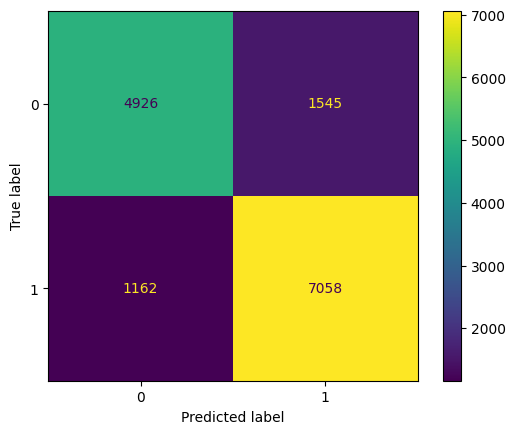

In [125]:
# plotting confusion matrix

cm = confusion_matrix(y_test, y_prediction_lr, labels = pipe.classes_)

ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = pipe.classes_).plot()
plt.show()

In [126]:
print(classification_report(y_test, y_prediction_lr))

              precision    recall  f1-score   support

           0       0.81      0.76      0.78      6471
           1       0.82      0.86      0.84      8220

    accuracy                           0.82     14691
   macro avg       0.81      0.81      0.81     14691
weighted avg       0.82      0.82      0.82     14691



## Cross-Validation

In [127]:
from sklearn.model_selection import cross_validate

In [128]:
# performing cross validation

cross_val = cross_validate(pipe, X_train, y_train, cv = 10)

In [129]:
cross_val["test_score"]

array([0.82099711, 0.81214906, 0.81487153, 0.82420014, 0.82079646,
       0.81415929, 0.81041525, 0.82539142, 0.81688223, 0.82437032])

In [130]:
cross_val["test_score"].mean()

0.8184232808424762

In [131]:
X.shape

(73454, 9)

In [132]:
y.shape

(73454,)

In [133]:
pipe.predict_proba(X_test)[28]

array([0.43191339, 0.56808661])

## Manual Shuffling

In [134]:
# now we have to shuffle the data because it can cause bias as it is grouped by id and innings

final_df1 = final_df.sample(final_df.shape[0])

In [135]:
X1 = final_df1.iloc[:,:-1]
y1 = final_df1.iloc[:, -1]

In [136]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size = 0.2, random_state = 1)

In [137]:
X_train1

,batting_team,bowling_team,city,target_score,runs_left,balls_left,wickets_left,current_run_rate,required_run_rate
77902,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,195,164,100,10,9.300000,9.840000
13277,Lucknow Super Giants,Rajasthan Royals,Mumbai,166,75,34,5,6.348837,13.235294
52491,Delhi Capitals,Kolkata Knight Riders,Kolkata,179,40,29,8,9.164835,8.275862
74420,Sunrisers Hyderabad,Gujarat Titans,Delhi,163,114,79,8,7.170732,8.658228
112961,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,133,13,5,3,6.260870,15.600000
...,...,...,...,...,...,...,...,...,...
31560,Rajasthan Royals,Punjab Kings,Mumbai,222,81,36,6,10.071429,13.500000
53822,Sunrisers Hyderabad,Mumbai Indians,Hyderabad,137,134,117,10,6.000000,6.871795
42087,Kolkata Knight Riders,Delhi Capitals,Sharjah,229,221,111,9,5.333333,11.945946
102760,Rajasthan Royals,Mumbai Indians,Mumbai,167,108,61,5,6.000000,10.622951


In [138]:
y_train1

77902     0
13277     0
52491     1
74420     1
112961    0
         ..
31560     0
53822     0
42087     0
102760    0
47233     0
Name: result, Length: 58763, dtype: int64

## Encoding

In [139]:
ct1 = ColumnTransformer([("ct1",\
                         OneHotEncoder(sparse = False, drop = "first"), ["batting_team", "bowling_team", "city"])],\
                       remainder = "passthrough")


## Logistic Regression

In [140]:
pipe1 = Pipeline(steps = [("step1", ct1), ("step2", LogisticRegression(solver = "liblinear"))])


In [141]:
pipe1.fit(X_train1, y_train1)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ct1',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', LogisticRegression(solver='liblinear'))])

In [142]:
X_train1.describe()

,target_score,runs_left,balls_left,wickets_left,current_run_rate,required_run_rate
count,58763.000000,58763.000000,58763.000000,58763.000000,58763.000000,58763.000000
mean,165.552950,92.592363,62.846604,7.581812,7.442424,10.551054
std,29.102976,49.724018,33.223907,2.140266,2.304776,13.718314
min,68.000000,-5.000000,-1.000000,0.000000,0.000000,-360.000000
25%,147.000000,54.000000,35.000000,6.000000,6.276923,7.111111
50%,165.000000,92.000000,63.000000,8.000000,7.500000,8.857143
75%,185.000000,130.000000,92.000000,9.000000,8.666667,10.928571
max,247.000000,247.000000,119.000000,10.000000,60.000000,714.000000


In [143]:
y_prediction_lr1 = pipe.predict(X_test1)

In [144]:
accuracy_score(y_test1, y_prediction_lr1)

0.8150568375195698

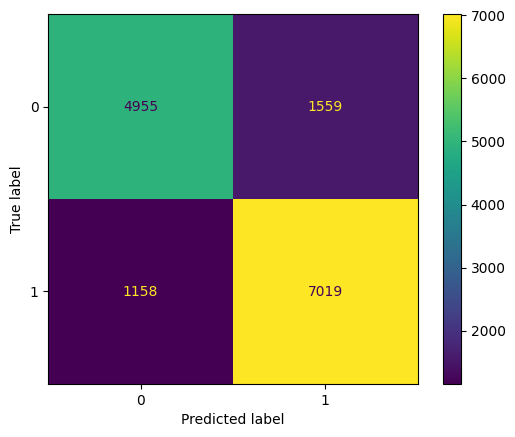

In [145]:
cm1 = confusion_matrix(y_test1, y_prediction_lr1, labels = pipe1.classes_)

ConfusionMatrixDisplay(confusion_matrix = cm1, display_labels = pipe.classes_).plot()
plt.show()


In [146]:
print(classification_report(y_test1, y_prediction_lr1))

              precision    recall  f1-score   support

           0       0.81      0.76      0.78      6514
           1       0.82      0.86      0.84      8177

    accuracy                           0.82     14691
   macro avg       0.81      0.81      0.81     14691
weighted avg       0.81      0.82      0.81     14691



## Cross-Validation

In [147]:
cross_val1 = cross_validate(pipe1, X_train1, y_train1, cv = 10)

In [148]:
cross_val1["test_score"]

array([0.82695253, 0.80755487, 0.81861494, 0.81926481, 0.82113683,
       0.82164738, 0.81552076, 0.8182437 , 0.81926481, 0.82896528])

In [149]:
cross_val1["test_score"].mean()

0.8197165908383027

In [150]:
X1.shape

(73454, 9)

In [151]:
y1.shape

(73454,)

In [152]:
pipe1.predict_proba(X_test1)[5]

array([0.10248946, 0.89751054])

## Pickling

In [153]:
import pickle


In [154]:
# serializing the code for deployment

pickle.dump(pipe, open("PySpark_LR.pkl", "wb"))